

# Projeto: Previsão de Turnover de Funcionários


![](https://drive.google.com/uc?export=view&id=1gXo89gL3Lm0AF-ZE09l-SCpO3RNWosnT)


- **O que é Turnover**: significa a taxa de rotatividade de de colaboradores dentro de uma empresa, sendo uma das áreas mais importantes para setores de Recursos Humanos em processos de gestão de pessoas. 
- **Importância da análise de turnover dentro das empresas**: o índice de giro de funcionários é essencial para a determinação de políticas de recursos humanos dentro da empresa, desde treinamentos até benefícios e programa de retenção de talentos. 
- **Custos do turnover para as empresas**: gastos com novas contratações e processos de seleção, gastos com treinamento e baixa produtividade de funcionários que ingressam na empresa, despesas trabalhistas de desligamento e contratação de funcionários, entre outros
- *A base de dados usada será a IBM HR Analytics Employee Attrition & Performance*: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-Attrition-dataset
- A informação completa acerca de cada atributo da base de dados pode ser encontrada no site http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

# 1) Sumário

- A rotatividade de funcionários é uma grande preocupação para muitas organizações, pois pode levar à perda de talentos valiosos e afetar a produtividade e eficiência geral da empresa. O principal objetivo deste projeto de ciência de dados é analisar e entender os fatores que contribuem para a rotatividade de funcionários e desenvolver um modelo preditivo para identificar os funcionários que são mais propensos a deixar a empresa.

- O projeto envolverá a análise de um conjunto de dados contendo informações sobre a demografia dos funcionários, características do trabalho, métricas de desempenho e outros fatores relevantes que poderiam potencialmente impactar a rotatividade de funcionários. Ao explorar os dados e realizar análises estatísticas, buscamos identificar os principais impulsionadores da rotatividade e obter insights sobre as tendências e padrões subjacentes.

- O próximo passo será desenvolver um modelo preditivo usando algoritmos de machine learning (os algoritmos testados foram Regressão Logística, KNearestNeighbors, Support Vector Machine, RandomForest, Redes Neurais e XGBoost) para prever com precisão quais funcionários estão em maior risco de deixar a empresa. Isso permitirá que a organização tome medidas proativas para reter esses funcionários e reduzir a taxa geral de rotatividade.

- As informações e recomendações geradas a partir deste projeto podem fornecer valiosos inputs para o departamento de recursos humanos e a alta gerência da organização, permitindo que eles tomem decisões baseadas em dados para reduzir a rotatividade e melhorar a retenção de funcionários.

# 2) Problema de Negócio

Trabalhamos na empresa XY e o gestor do setor disse que a empresa está perdendo muitos funcionários, e ele precisa prever quais funcionáros tem mais probabilidade de sair, por quais motivos, e o que pode ser feito para evitar .



## 2.1) A Gerência

- A primeira coisa a se fazer é perguntar ao chefe qual é o objetivo comercial, já que dificilmente o objetivo final é a construção do modelo de predição.


- Após, precisamos saber qual é o prejuízo pra empresa quando um funcionário sai.
- Se é possível quantificar esse prejuízo, em gastos a mais processos seletivos, entrevistas, contratações, tempo de treinamento de novos funcionáros, somado ao que o funcionário que saiu vai deixar de gerar à empresa.
- Precisamos também saber há quanto tempo ocorre esse problema, ou quando ele cocmeçou a chamar mais a atenção, ou seja, comçaram a aumentar os gastos da empresa
- E por fim, como a empresa está lidando atualmente com esse problema de saída de funcionáros, quais são as ações que estão sendo tomadas, para termos uma base da eficiência mínimo para o nosso modelo  

## 2.2) Recursos Humanos

- Após, precisamos dos dados dos funcionários, e no nosso caso hipotético, conseguiremos com o setor de RH da empresa. 
- Precisamos saber se foi o próprio setor que coletou os dados, e fazer algumas perguntas a eles:

- Sobre o conjunto de dados
      1. Como os dados foram coletados?
      2. São dados de todos os funcionários da empresa, ou é só uma amostra do total?
      3. Caso seja apenas uma amostra, qual foi o tipo de técnica de amostragem que foi usada, para para garantir que os nossos dados sejam o mais próximo possível das características da população, evitando ao máximo qualquer viés nos dados.   
      4. O que significa cada uma das variáveis do dataset?
      5. Quando os dados foram coletados?
      6. O dataset está sempre recebendo novos registros, ou este é o dataset final?

Temos uma tarefa típica de aprendizado supervisionado, uma vez que recebemos exemplos rotulados de treinamento (cada
instância vem com o resultado esperado, ou seja, se o funcionário saiu ou não da empresa). Além disso, também é uma tarefa típica de classificação Binária

# 3) Análise Exploratória

Terminada a etapa inicial de planejamento e preparação, vamos importar as bibliotecas do python que serão usadas e analisando o Dataset.

A coluna 'Attrition' (desgaste do funcionário) será a variável que vamos prever, o nosso target. Ela possui dois valores, 'Yes' e 'No', então esse é um problema de Classificação Binária. 

## 3.1) Importação das Bibliotecas

In [162]:
# Importando as bibliotecas que serão usadas 
import pandas as pd
import numpy as np

# Biblioteca gráficas:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from yellowbrick.target import class_balance
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.target import ClassBalance
!pip install -q scikit-plot
import scikitplot as skplt

# Machine Learning:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Métricas de avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

# Importando a biblioteca imblearn e o SMOTE para balanceamento dos dados
from imblearn.over_sampling import SMOTE

# Importando a biblioteca pickle para salvar o modelo final
import pickle

In [163]:
# Por padrão, o pandas mostra as primeiras dez e as últimas dez colunas do Dataframe.
# Usaremos essa comando para que o pandas mostre todas as colunas
pd.options.display.max_columns = 50

In [164]:
# Carregando o Dataset 'Turnover_Funcionários'
df = pd.read_csv('Turnover_Funcionarios.csv')

In [165]:
# Conferindo a quantidade de colunas e linhas do DataFrame


print(f'O Dataframe tem {df.shape[0]} linhas e {df.shape[1]} colunas')

O Dataframe tem 1470 linhas e 35 colunas


In [166]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 3.2) Tratamento de Valores Nulos e Duplicados

In [167]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 0 valores nulos


## 3.3) Resumo do Dataset


In [168]:
# Checando o nome e tipo de dado de cada coluna (Feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

O Dataset possui 35 variáveis, sendo 26 númericas (algumas variáveis categóricas estão no formato númerico, como as variáveis medidas em níveis) e 9 do tipo object/string

In [169]:
# Descrição estatística das colunas categóricas (quantidade de categorias diferentes, quais mais aparecem na coluna e a frequência)
df.describe(include=["O"]).T.iloc[:, 1:]

,unique,top,freq
Attrition,2,No,1233
BusinessTravel,3,Travel_Rarely,1043
Department,3,Research & Development,961
EducationField,6,Life Sciences,606
Gender,2,Male,882
JobRole,9,Sales Executive,326
MaritalStatus,3,Married,673
Over18,1,Y,1470
OverTime,2,No,1054


In [170]:
# Podemos perceber acima que que coluna 'Over18' tem apenas um valor (Y),
# e por isso podemos removê-la do nosso dataframe

df.drop('Over18', axis = 1, inplace=True)

Para facilitar o trabalho com a coluna que queremos prever ('Attrition'), vamos fazer algumas alterações, mudando seu nome para 'Turnover' e passando-a para o final do DataFrame

In [171]:
# Verificando a ordem e o nome das colunas para poder renomear e deixar a coluna 'Attrition' no final do DataFrame
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [172]:
# Renomeamos a coluna 'Attrition' para 'Turnover'

df = df.rename(columns = {'Attrition':'Turnover'})

In [173]:
# Passamos a coluna 'Turnover' (nossa variável dependente) para o final do DataFrame
df = df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Turnover']]

In [174]:
# Visualizando se as alterações foram feitas corretamente
df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,No


In [175]:
# Função que retorna a descrição estatística das colunas numéricas (valores mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning
def estatisticas(data):
  return data.describe().T.iloc[:,1:]

estatisticas(df)

,mean,std,min,25%,50%,75%,max
Age,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Em uma análise inicial, notamos duas colunas que chamam a atenção:
- 'StandardHours' - parece ter apenas um valor (80). Iremos análisá-la posteriormente
- 'NumCompaniesWorked' - coluna da quantidade de empresas que o funcionário já trabalhou. O valor mínimo é 0. Pesquisando a fonte dos dados, descobrimos que esses registros se referem a funcionários que não trabalharam efetivamente em empresas (trabalho informal, autônomos, entre outros). Decidimos mudar esses valores para 1

In [176]:
# Vamos ver a quantidade de registros/linhas em que o valor da coluna 'NumCompaniesWorked' é igual a 0
df.loc[df['NumCompaniesWorked']==0, :].shape[0]

197

In [177]:
# A quantidade de registros correspondente aos valores da coluna
df['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [178]:
# Agora passar os valores 0 para 1 na coluna 'NuumCompaniesWorked'

df.loc[df['NumCompaniesWorked']==0, 'NumCompaniesWorked'] = 1

In [179]:
# Vamos dividir o dataset entre os funcionários que saíram e os que ficaram,
# para tirarmos alguns insights usando o método describe

sairam_df = df[df['Turnover'] == 'Yes']
ficaram_df = df[df['Turnover'] == 'No']

In [180]:
def df_medias(data):
  """retorna um novo dataframe com as colunas media_ficaram, media_sairam,
  diferença e deferença% """

  media_ficaram = pd.DataFrame(estatisticas(ficaram_df)['mean'])
  media_sairam = pd.DataFrame(estatisticas(sairam_df)['mean'])
  media = pd.concat([media_ficaram, media_sairam], axis=1)
  media.columns = ['media_ficaram', 'media_sairam']
  media['diferença'] = media['media_ficaram'] - media['media_sairam']
  media['diferença %'] = ((media['media_sairam'] - media['media_ficaram'])/media['media_ficaram'])*100
  return media

In [181]:
media = df_medias(df)

In [182]:
media

,media_ficaram,media_sairam,diferença,diferença %
Age,37.561233,33.607595,3.953638,-10.525847
DailyRate,812.504461,750.362869,62.141591,-7.648154
DistanceFromHome,8.915653,10.632911,-1.717259,19.261164
Education,2.927007,2.839662,0.087345,-2.984101
EmployeeCount,1.000000,1.000000,0.000000,0.000000
EmployeeNumber,1027.656123,1010.345992,17.310132,-1.684428
EnvironmentSatisfaction,2.771290,2.464135,0.307155,-11.083451
HourlyRate,65.952149,65.573840,0.378310,-0.573612
JobInvolvement,2.770479,2.518987,0.251491,-9.077535
JobLevel,2.145985,1.637131,0.508855,-23.711932


In [183]:
# Vamos analisar os itens que tem uma maior diferença percentual 
# entre os funcionáros que saíram e os que ficaram

media['diferença %'].sort_values()

StockOptionLevel           -37.589592
YearsInCurrentRole         -35.262402
YearsWithCurrManager       -34.690596
TotalWorkingYears          -30.500124
YearsAtCompany             -30.373338
MonthlyIncome              -29.938896
JobLevel                   -23.711932
YearsSinceLastPromotion    -12.944933
JobSatisfaction            -11.165178
EnvironmentSatisfaction    -11.083451
Age                        -10.525847
JobInvolvement              -9.077535
DailyRate                   -7.648154
TrainingTimesLastYear       -7.358297
RelationshipSatisfaction    -4.931489
WorkLifeBalance             -4.415429
Education                   -2.984101
EmployeeNumber              -1.684428
PercentSalaryHike           -0.880414
HourlyRate                  -0.573612
StandardHours                0.000000
EmployeeCount                0.000000
PerformanceRating            0.089858
MonthlyRate                  2.057572
NumCompaniesWorked           9.016961
DistanceFromHome            19.261164
Name: difere

## 3.4) Hipóteses iniciais:

- A maior diferença percentual absoluta entre os funcionáros que saíram e os que permaneceram é em relação à variável *'stockOptionLevel'* (37,56%)

- **O que é stock option** : Em geral, a stock option permite que o funcionário possa adquirir ações da empresa a um valor abaixo do mercado. Na prática, a organização oferece uma cota predeterminada de ações que podem ser compradas como forma de reconhecimento (ou aumento dos ganhos do funcionário) ou como compensação por metas e objetivos.  


- As seguintes variáveis também apresentaram uma diferença percentual significativa : 
- *YearsInCurrentRole* (35,26%)
- *YearsWithCurrManager* (34,69%)
- T*otalWorkingYears* (30,5%)
- *YearsAtCompany* (30.37%)

- Todas essas variáveis tem relação ao tempo de trabalho (na empresa, com o chefe atual, no cargo atual e no tempo de trabalho total): quanto mais tempo na empresa, menor a chance do funcionário sair.

- A média da distância de casa ao trabalho dos funcionários que ficaram é cerca de 2 unidades a menos, não há informação se são em quilômetros ou milhas (8,9 a 10,6) : quanto menos tempo o funcionário perde no trânsito, mais satisfeito com o ambiente de trabalho, e assim, menos a chance de sair.

- A média do 'JobLevel' é quase 25% maior nos funcionáros que ficaram (21,4 a 2,63): quanto melhor o cargo, maior o salário e os benefícios, o que tende a fazer o funcionário permanecer na empresa.

# 4) Visualização dos dados

## 4.1) Histogramas

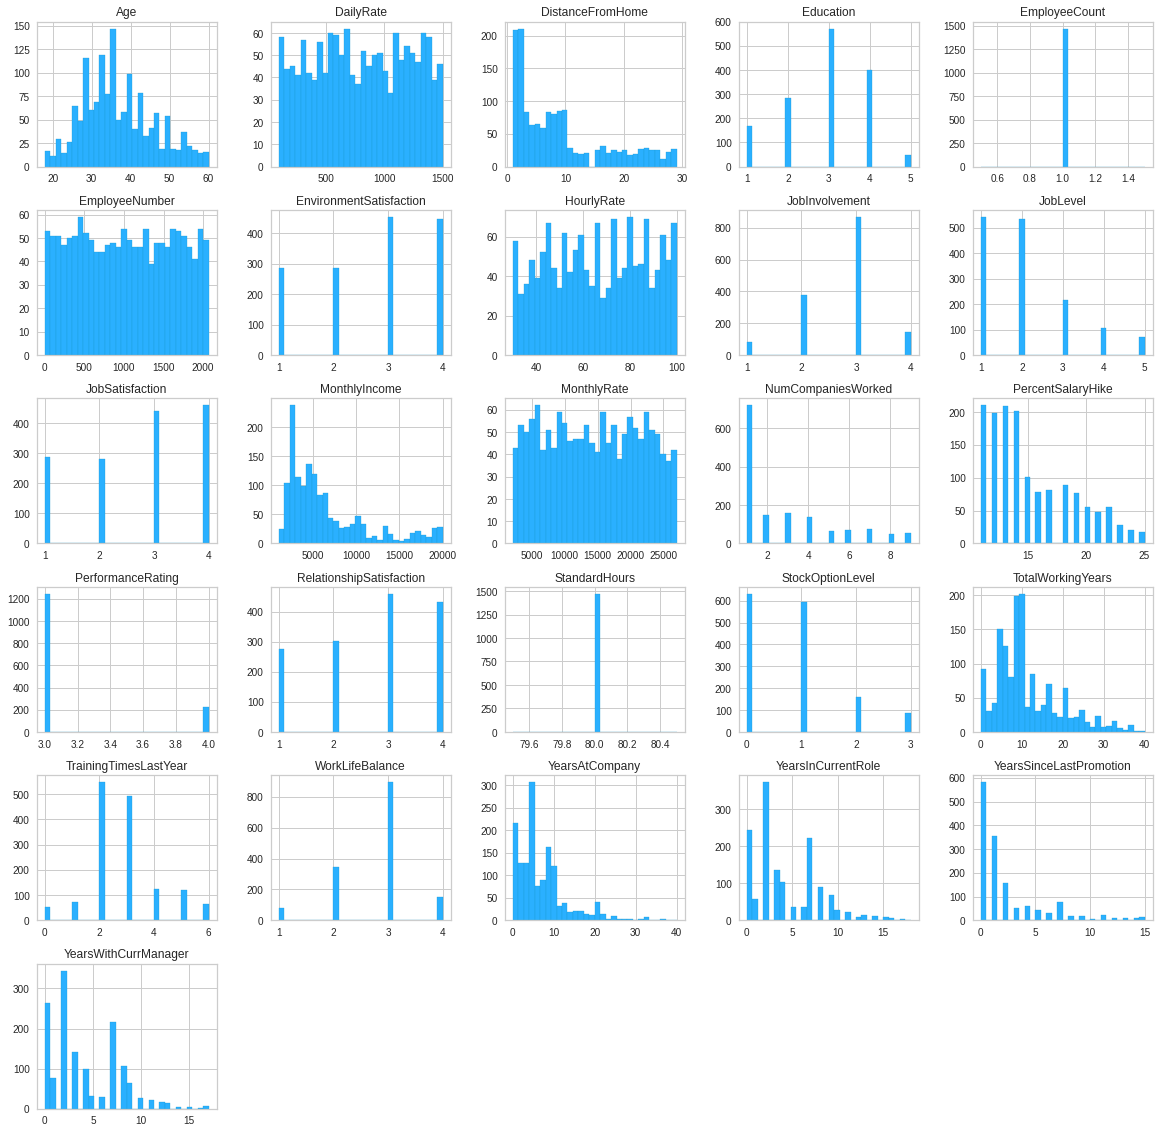

In [23]:
# Analisando a distribuição de frequência (histogramas) das variáveis numéricas

df.hist(bins = 30, figsize=(20,20), facecolor = '#2ab0ff', edgecolor='#169acf');

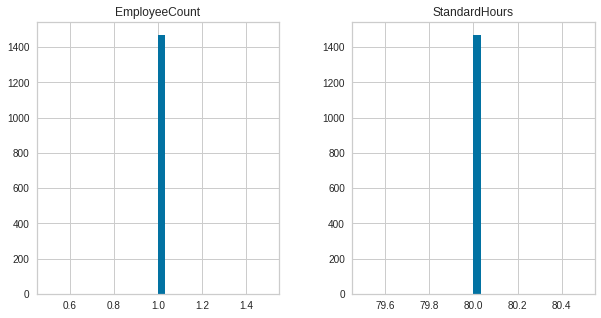

In [24]:
# Os gráficos de duas das colunas chamam a atenção

df[['EmployeeCount', 'StandardHours']].hist(bins = 30, figsize=(10,5), color = 'b');

In [25]:
# Pelos gráficos das variáveis 'EmployeeCount', e 'StandardHours', bem como a análise estatística feita anteriormente, podemos perceber que elas só têm um valor cada
# Por isso não serão úteis para para os nossos algoritmos
# A coluna 'EmployeeNumber' tem relação apenas com o ID do funcionário, e por esse motivo também pode ser removida do DataFrame 

df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace=True)

In [26]:
# Vamos criar dois DataFrames para termos uma ideia melhor da distribuição do dataset entre os funcionários que saíram e os que ficaram na empresa (coluna 'Turnover')  

sairam_df = df[df['Turnover'] == 'Yes']
ficaram_df = df[df['Turnover'] == 'No']

In [27]:
# Aqui usamos a função len para sabermos a quantidade de linhas de cada subdatset criado
# Sabemos que cada linha se refere a um funcionário

print(f'Total = {len(df)} funcionários')
print('-'*30)
print(f'Número de funcionários que saíram da empresa = {len(sairam_df)}')
print(f'Número de funcionários que ficaram na empresa = {len(ficaram_df)}', end='\n'*2)

print(f'Porcentagem de funcionários que saíram da empresa = {round(len(sairam_df) / len(df) * 100,2)}%')
print(f'Porcentagem de funcionários que ficaram na empresa = {round(len(ficaram_df) / len(df) * 100, 2)}%')

Total = 1470 funcionários
------------------------------
Número de funcionários que saíram da empresa = 237
Número de funcionários que ficaram na empresa = 1233

Porcentagem de funcionários que saíram da empresa = 16.12%
Porcentagem de funcionários que ficaram na empresa = 83.88%


Text(0, 0.5, '')

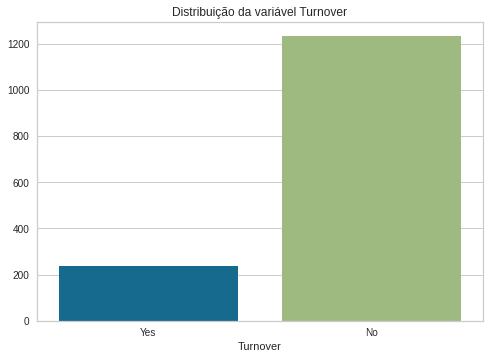

In [28]:
plt.title('Distribuição da variável Turnover')
sns.countplot(x='Turnover', data=df)
plt.ylabel('')

Podemos perceber que o dataset está desbalanceado em relação a coluna 'Turnover'. Precisaremos tomar alguns cuidados adicionais quando formos dividir o dataframe entre treino e teste, para que a proporção entre os funcionários que saíram e os que ficaram seja a mesma nos dois conjuntos

## 4.2) Gráficos de Barras

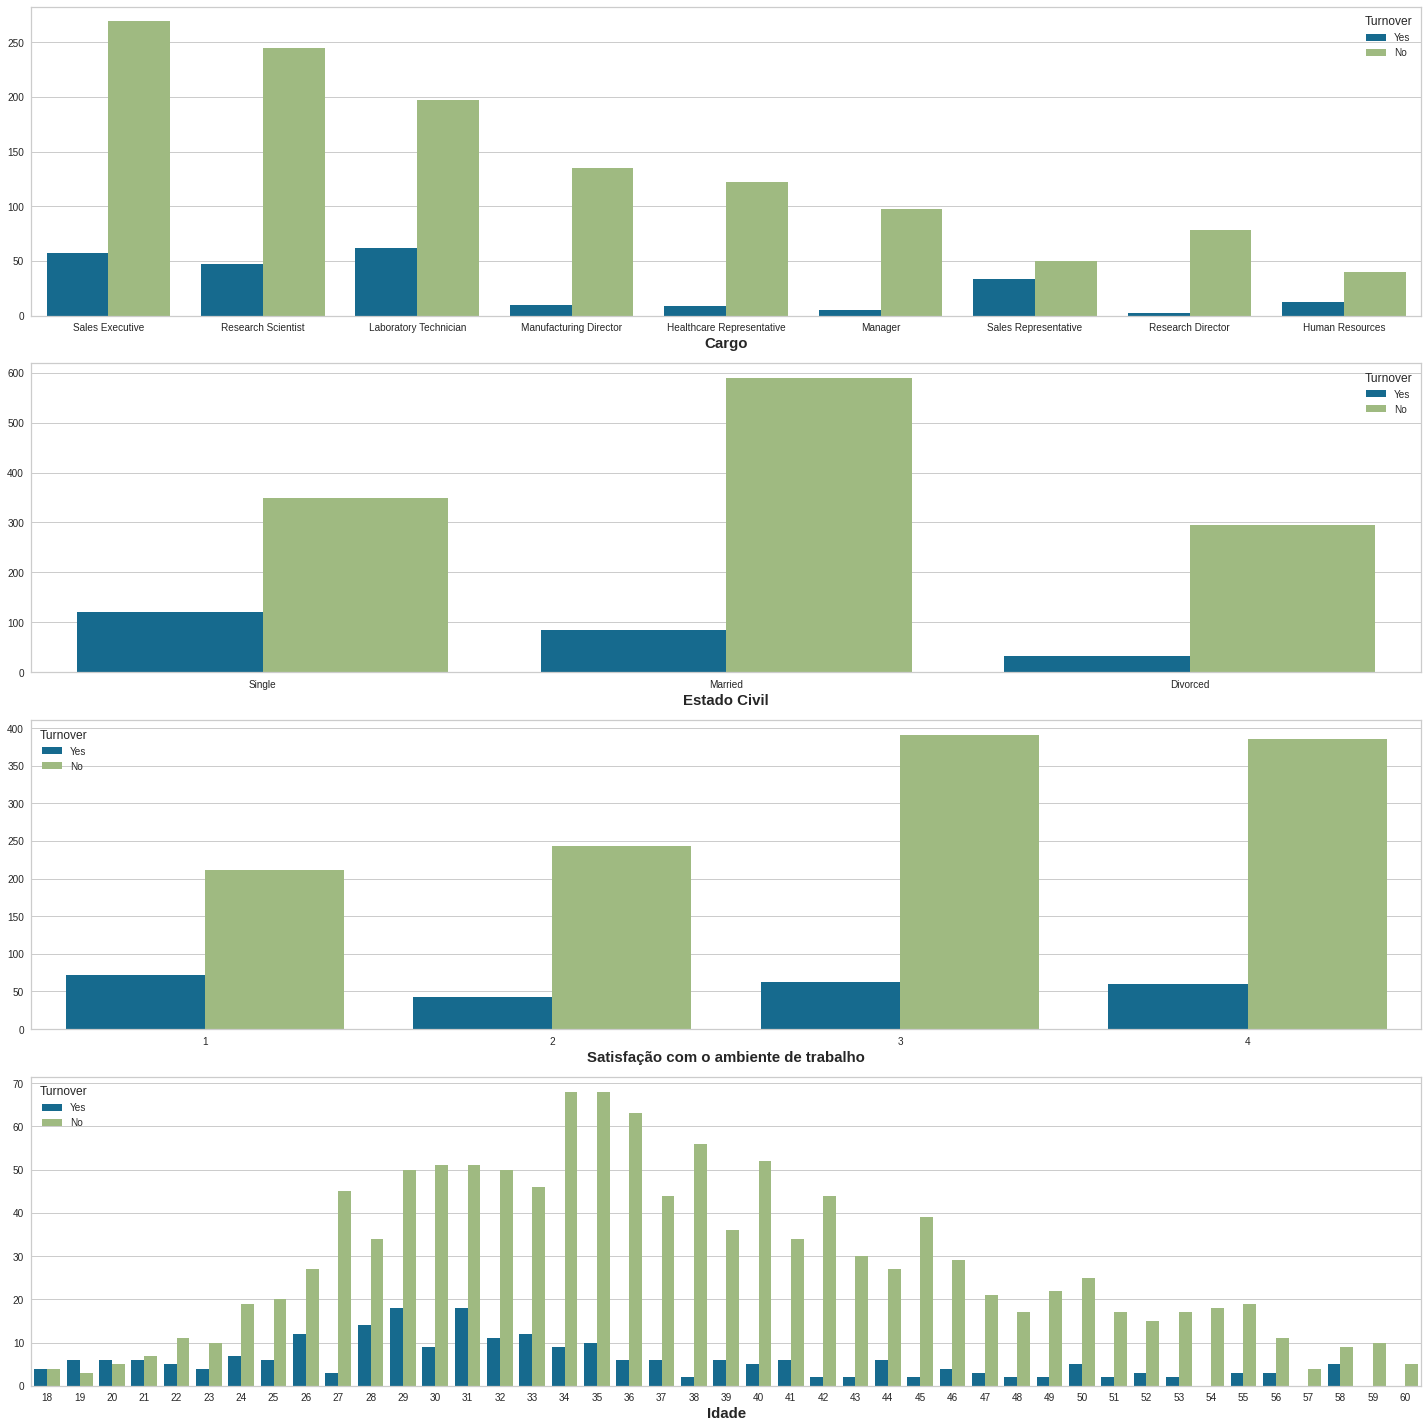

In [29]:
# Vamos analisar a relação entre a saída ou não dos funcionários em relação a alguns dos fatores como idade, estado civil e cargo

plt.figure(figsize=[20,20])

plt.subplot(4,1,1)
sns.countplot(x = 'JobRole', hue = 'Turnover', data = df)
plt.xlabel('Cargo', fontsize=15, weight='bold')
plt.ylabel('')

plt.subplot(4,1,2)
sns.countplot(x = 'MaritalStatus', hue = 'Turnover', data = df)
plt.xlabel('Estado Civil', fontsize=15, weight='bold')
plt.ylabel('')

plt.subplot(4,1,3)
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Turnover', data = df)
plt.xlabel('Satisfação com o ambiente de trabalho', fontsize=15, weight='bold')
plt.ylabel('')

plt.subplot(4,1,4)
sns.countplot(x = 'Age', hue = 'Turnover', data=df)
plt.xlabel('Idade', fontsize=15, weight='bold')
plt.ylabel('')

plt.tight_layout()

## 4.3) Boxplots

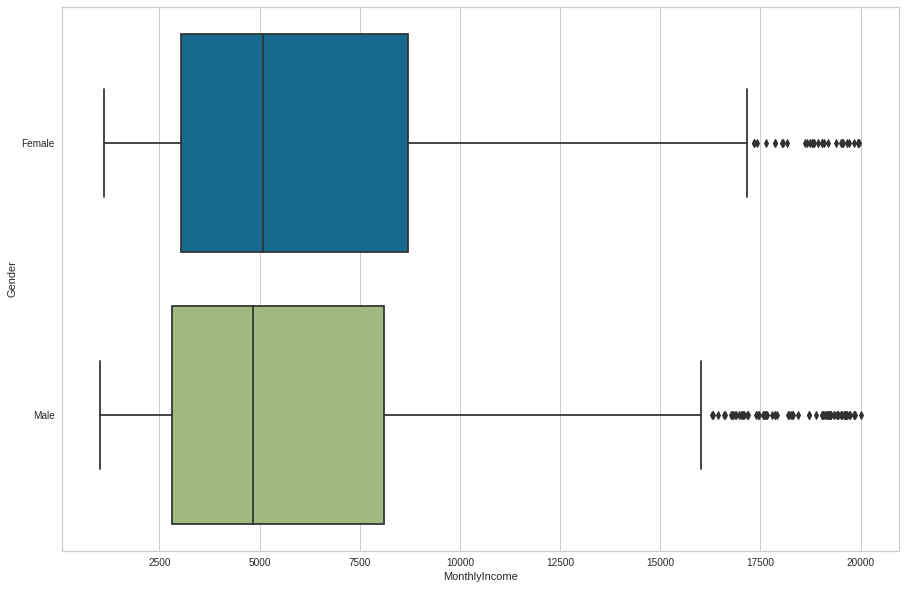

In [30]:
# Analisando a distribuição da coluna 'MonthlyIncome' (salário) entre os gêneros dos funcionários

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=df);

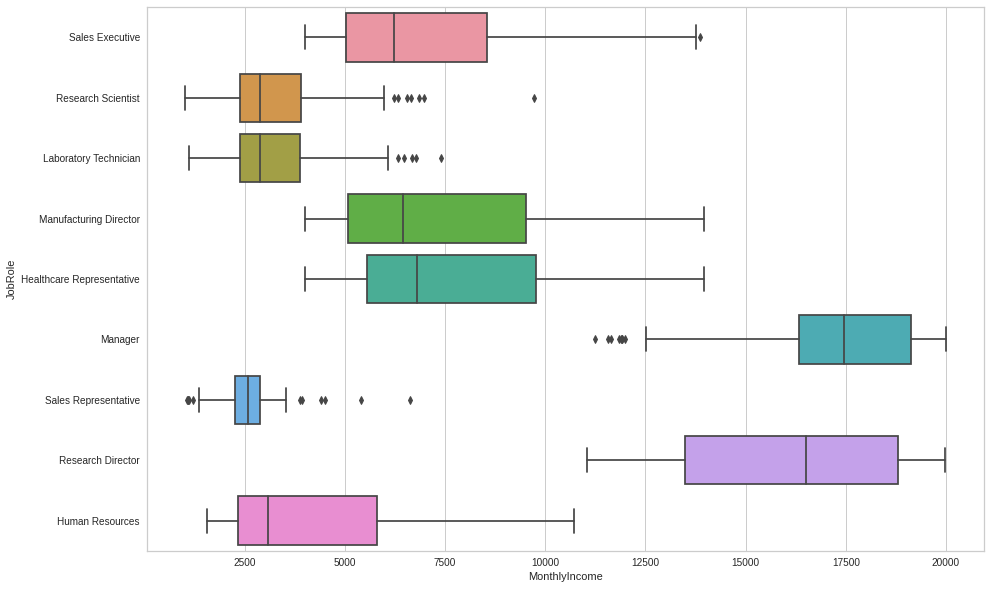

In [31]:
# Analisando a distribuição da coluna 'MonthlyIncome' (salário) por cargos

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df);

In [32]:
# Já iniciando o pré-processamento dos dados, vamos aplicar uma função simples convertendo Yes para 1 e No para 0 nas colunas 'Turnover' e 'OverTime'
# para incluir a coluna 'Turnover' na Dataframe de correlação entre as variáveis (apenas colunas numéricas) 

df['Turnover'] = df['Turnover'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [33]:
# Conferindo se a função foi aplicada corretamente

df[['Turnover', 'OverTime']].head()

,Turnover,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


## 4.4) Pie Chart 

In [34]:
# Vamos criar dois dataframes, um com os funcionários que saíram (Turnover = (df2) 
#e o outro com os que ficaram (não-Turnover = (df1)
ficaram = df.loc[df.Turnover == 0]
sairam = df.loc[df.Turnover == 1]

# Vamos definir os valores que serão usados para plotar os gráficos
tipos1 = ficaram["MaritalStatus"].value_counts()
transacoes1 = tipos1.index
quantidade1 = tipos1.values

tipos2 = sairam["MaritalStatus"].value_counts()
transacoes2 = tipos2.index
quantidade2 = tipos2.values

In [35]:
# Importando a biblioteca plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Criando subplots, para que um gráfico fique ao lado do outro para facilitar a visualização e as análises

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=transacoes1, values=quantidade1, name="Não"),
              1, 1)
fig.add_trace(go.Pie(labels=transacoes2, values=quantidade2, name="Turnover"),
              1, 2)

# Usando o atributo hole do gráfico para colocar a qual classe pertence
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Tipos de estado civil por Turnover ou não Turnover",
    # Adicionando o tipo de classe no centro de cada gráfico
    annotations=[dict(text='saíram', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='ficaram', x=0.81, y=0.5, font_size=18, showarrow=False)])
fig.show()

## 4.5) Heatmap

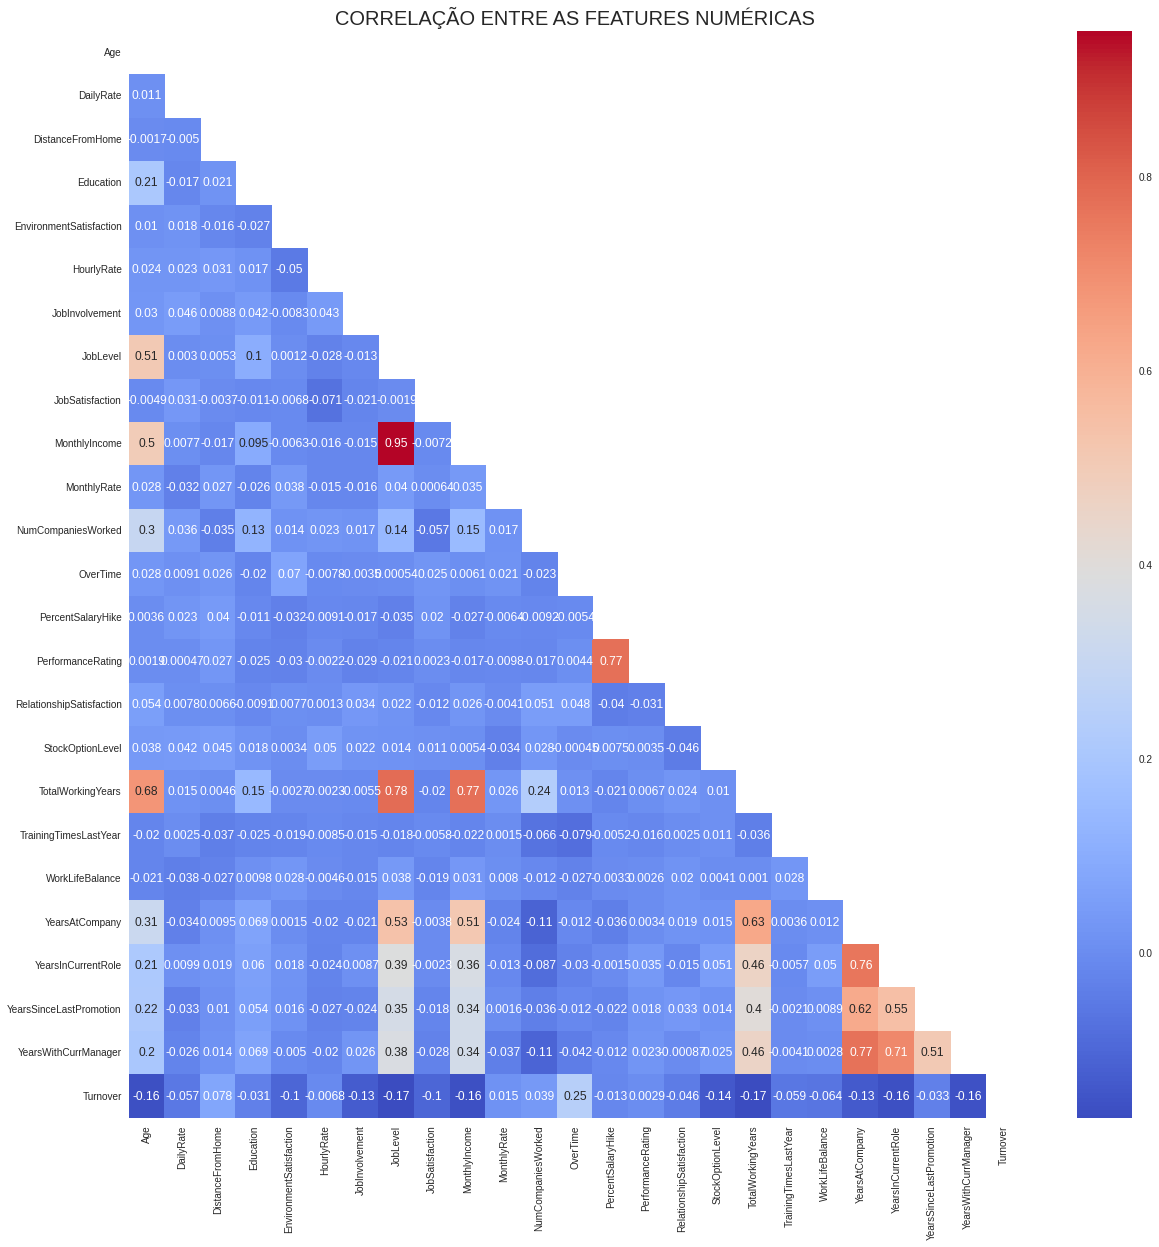

In [36]:
# Heatmap das correlações entre as variáveis númericas

mask = np.triu(np.ones_like(df.corr()))
correlacoes = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', mask=mask);
plt.title('CORRELAÇÃO ENTRE AS FEATURES NUMÉRICAS', fontsize=20);


In [37]:
correlacoes['Turnover'].sort_values(ascending=False).iloc[1:]

OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.038943
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Turnover, dtype: float64

In [38]:
correlacoes['Turnover'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:]

OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.038943
YearsSinceLastPromotion     0.033019
Education                   0.031373
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
HourlyRate                  0.006846
PerformanceRating           0.002889
Name: Turnover, dtype: float64

Em uma análise inicial, a coluna 'OverTime' (hora extra) parece ser o fator que tem a maior contribuição na saída de funcionários da empresa  

## 4.6) KDE (Kernel Density Estimate)

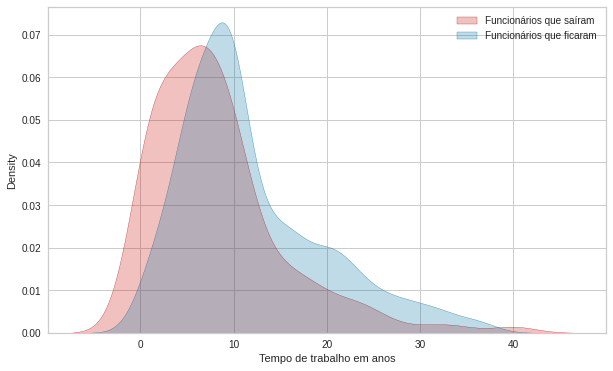

In [39]:
plt.figure(figsize = [10,6])
sns.kdeplot(sairam['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.xlabel('Tempo de trabalho em anos')
plt.legend();

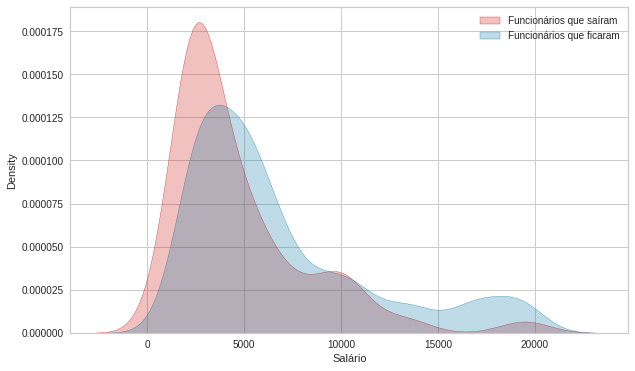

In [40]:
plt.figure(figsize = [10,6])
sns.kdeplot(sairam['MonthlyIncome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram['MonthlyIncome'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.xlabel('Salário')
plt.legend();

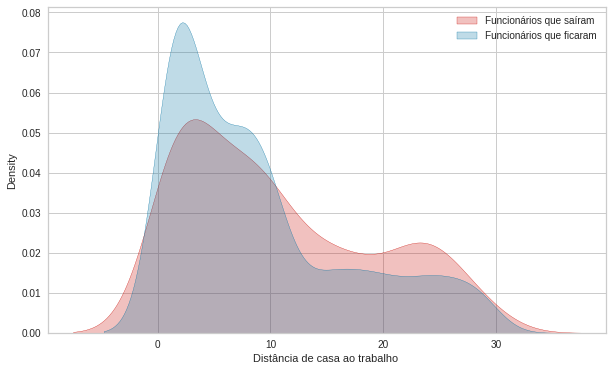

In [41]:
plt.figure(figsize = [10,6])
sns.kdeplot(sairam['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(ficaram['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b')

plt.xlabel('Distância de casa ao trabalho ')
plt.legend();

# 5) Pré-Processamento dos Dados



Podemos ver que existem várias colunas que contêm atributos não numéricos. A maioria dos algoritmos de machine learning esperam dados númericos, o que requer que as variáveis categóricas sejam convertidas em numéricas.

As colunas 'Turnover' e 'Overtime' já foram transformadas de string para númericas


## 5.1) One Hot Encoding

Uma das técnicas para transformação das variáveis categóricas em númericas é o One Hot Encoding, que cria variáveis 'dummies'

In [42]:
# Vamos usar o método get_dummies
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)

In [43]:
# # O dataframe após a criação das variáveis dummies
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Turnover', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
 

In [44]:
# Após a criação das variáveis dummies, o Dataframe tem 45 colunas
len(df.columns)

45

In [45]:
correlacoes['Turnover'].sort_values(ascending=False).iloc[1:]

OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.038943
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Turnover, dtype: float64

## 5.2) Normalização

O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Esse método é necessário quando os parâmetros estiverem escalas muito diferentes.

No nosso caso, um exemplo é a diferença entre a escala da variável 'MonthlyRate' (2094 a 26999) e 'PerformanceRating' (3 a 4)

In [46]:
# A normalização das variáveis é importante para que os algoritmos de machine learning não dêem importância maior para as variáveis com escala maior
# Para isso usaremos o algoritmo RobustScaler da biblioteca sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [47]:
# O dataframe após a normalização das variáveis

df_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Turnover,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.875,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.000,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.625,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.000,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 6) Modelos de Machine Learning

Faremos agora a divisão do dataframe entre as variáveis independentes (X) e a variável que queremos prever (y)

In [48]:
X = df_scaled.drop('Turnover', axis=1)
y = df_scaled['Turnover']

Divisão entre o conjunto de treino e o conjunto de teste para podermos avaliar os modelos

In [49]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0,stratify = y)

Importando as métricas de avaliação dos modelos de machine learning 

In [50]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

## 6.1) Regressão Logística

Implementação e análise de métricas do modelo de Regressão Logística

In [51]:
# Importamos o modelo de Regressão Logística da biblioteca sklearn
from sklearn.linear_model import LogisticRegression

In [52]:
# Criamos o modelo e o "treinamos" com os dados de treino
log = LogisticRegression(max_iter=1000, random_state=42)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Vamos prever o y (turnover ou não do funcionários) com o X de teste e comparar com a realidade (y de teste)
# Criamos o modelo e o "treinamos" com os dados de treino

y_pred_log = log.predict(X_test)



![](https://drive.google.com/uc?export=view&id=1Ph9WnbGin-WdBwfkflxh6XTepgaI_Sd8)

In [54]:
# Vamos visualizar a matriz de confusão da avaliação do modelo
# A matriz de confusão fornece os tipos de acertos e erros do modelo (verdadeiro positivo, verdadeiro negativo, falso positivo e falso negativo)

confusion_matrix(y_test, y_pred_log)

array([[245,   2],
       [ 33,  14]])

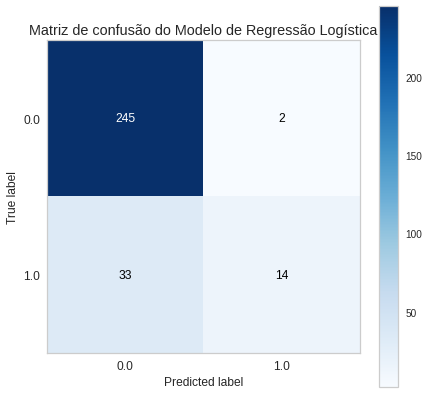

In [55]:
plt.rcParams['figure.figsize'] = (7., 7.);
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log, title='Matriz de confusão do Modelo de Regressão Logística', cmap='Blues')

In [56]:
# Avaliando o modelo de Regressão Logística

print('Regressão Logística')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_log)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_log)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_log)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_log)*100, 2)}%')

Regressão Logística
--------------------
Acurácia: 88.1%
Precisão: 87.5%
Sensibilidade: 29.79%
f1_score: 44.44%


## 6.2) KNN (K Nearest Neighbours)

Implementação e ánálise das métricas do modelo KNN

In [57]:
# Importamos o modelo KNN da biblioteca sklearn

from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Criamos o modelo e o "treinamos" com os dados de treino

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
# Vamos prever o y (turnover ou não do funcionários) com o X de teste e comparar com a realidade (y de teste)

y_pred_knn = knn.predict(X_test)

In [60]:
# Visualizando a matriz de confusão do modelo KNN
confusion_matrix(y_test, y_pred_knn)

array([[236,  11],
       [ 43,   4]])

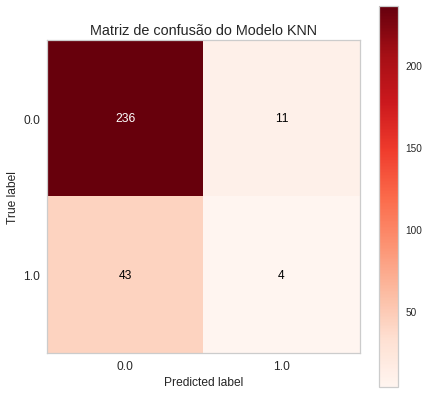

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, title='Matriz de confusão do Modelo KNN', cmap='Reds');

In [62]:
print('      KNN')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_knn)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_knn)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_knn)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_knn)*100, 2)}%')

      KNN
--------------------
Acurácia: 81.63%
Precisão: 26.67%
Sensibilidade: 8.51%
f1_score: 12.9%


## 6.3) Suport Vector Machine (SVM)

Implementação e ánálise das métricas do modelo SVM

In [63]:
# Importando o modelo de Regressão Logística da biblioteca sklearn
from sklearn.svm import SVC

In [64]:
# Criação e treinamento do modelo

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [65]:
# Vamos prever o y (turnover ou não do funcionários) com o X de teste e comparar com a realidade (y de teste)

y_pred_svc = svc.predict(X_test)

In [66]:
# Visualizando a matriz de confusão do modelo SVM
confusion_matrix(y_test, y_pred_svc)

array([[247,   0],
       [ 45,   2]])

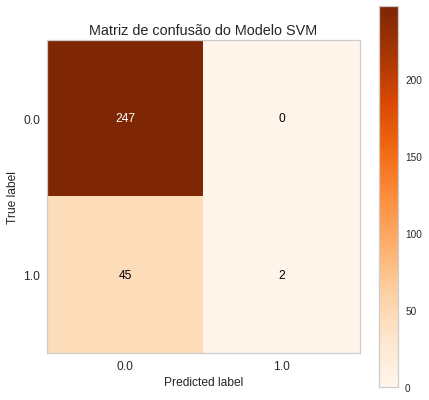

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, title='Matriz de confusão do Modelo SVM', cmap='Oranges');

In [68]:
print('      SVC')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_svc)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_svc)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_svc)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_svc)*100, 2)}%')

      SVC
--------------------
Acurácia: 84.69%
Precisão: 100.0%
Sensibilidade: 4.26%
f1_score: 8.16%


## 6.4) Random Forest

Implementação e teste do Modelo Random Forest

In [69]:
# Importando o modelo Random Forest da biblioteca sklearn
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Criação, treinamento e previsões do modelo para o conjunto de teste

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [71]:
# Visualizando a matriz de confusão do modelo Random Forest

confusion_matrix(y_test, y_pred_forest)

array([[246,   1],
       [ 42,   5]])

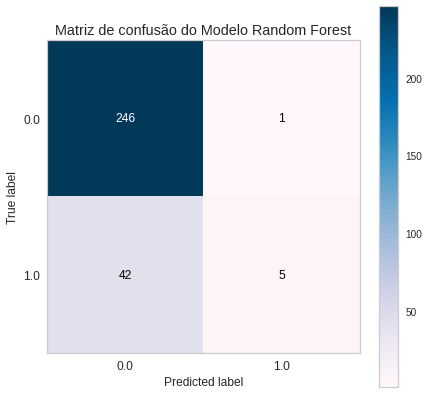

In [72]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_forest, title='Matriz de confusão do Modelo Random Forest', cmap='PuBu');

In [73]:
print('Random Forest')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_forest)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_forest)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_forest)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_forest)*100, 2)}%')

Random Forest
--------------------
Acurácia: 85.37%
Precisão: 83.33%
Sensibilidade: 10.64%
f1_score: 18.87%


## 6.5) Redes neurais artificiais

- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [74]:
# A biblioteca tensorflow é otimizada para deep learning
import tensorflow as tf

In [75]:
# A camada de entrada do algoritmo de rede neural deve ser do mesmo tamanho do número de colunas do dataframe (44)
X_train.shape

(1176, 44)

In [76]:
rede_neural = tf.keras.models.Sequential()     # classe para definir camada neural para o TensorFlow
rede_neural.add(tf.keras.layers.Dense(units = 22, activation='relu', input_shape=(44,)))   # Adicionando a primeira camada oculta de entrada de neurônios
#rede_neural.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))    # Adicionando a segunda camada oculta de entrada de neurônios
#rede_neural.add(tf.keras.layers.Dense(units = 22, activation = 'relu'))    # Adicionando a tercerira camada oculta de entrada de neurônios
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  # Adicionando a camada de saída

In [77]:
# Summary é o método para visualizar a estrautura da rede neural (cada camada)

rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                990       
                                                                 
 dense_1 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [78]:
# o parâmetro optimizer é o algoritmo usado para fazer o ajuste dos 1.013 "pesos"
# o parâmetro loss é como o erro vai ser calculado (loss='binary_crossentropy' porque é um problema de classificação binária)

rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['Recall'])

In [79]:
# Treinando o modelo com os dados de treino
rede_neural.fit(X_train, y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 2s 3ms/step - loss: 0.4737 - recall: 0.0421
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 0.4128 - recall: 0.0000e+00
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 0.3949 - recall: 0.0053
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3791 - recall: 0.0316
Epoch 5/50
37/37 [==============================] - 0s 7ms/step - loss: 0.3666 - recall: 0.0579
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.3559 - recall: 0.0947
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 0.3450 - recall: 0.1684
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 0.3393 - recall: 0.1947
Epoch 9/50
37/37 [==============================] - 0s 10ms/step - loss: 0.3310 - recall: 0.2000
Epoch 10/50
37/37 [==============================] - 0s 5ms/step - loss: 0.3246 - recall: 0.2632
Epoch 11/50
37/37 [===============

In [80]:
# Prevendo o valor de y para o conjunto de teste
y_pred_neural = rede_neural.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [81]:
# Definindo o threshold (limite) para a classificação binária
y_pred_neural = (y_pred_neural >= 0.5)

In [82]:
# Matriz de confusão do modelo de rede Neural
confusion_matrix(y_test, y_pred_neural)

array([[243,   4],
       [ 35,  12]])

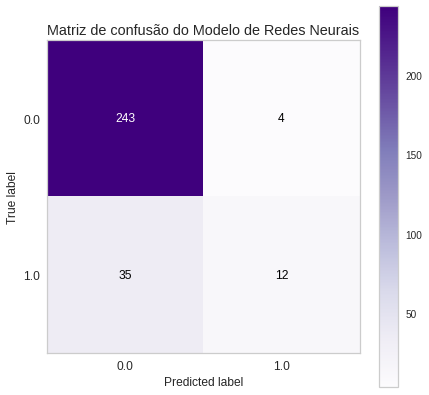

In [83]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_neural, title='Matriz de confusão do Modelo de Redes Neurais', cmap='Purples');

In [84]:
print('Redes Neurais')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_neural)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_neural)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_neural)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_neural)*100, 2)}%')

Redes Neurais
--------------------
Acurácia: 86.73%
Precisão: 75.0%
Sensibilidade: 25.53%
f1_score: 38.1%


# 7) Escolha do Modelo



## 7.1) Métricas de Avaliação

- Modelos de machine learning possuem diversas métricas de avaliação, que também são diferentes a depender do tipo de problema e algoritmos (classificação, clustering ou regressão). 

- Ao desenvolver projetos de Machine Learning e Data Science, é crucial a utilização de métricas apropriadas para cada problema. O valor delas reflete a qualidade de um modelo, portanto se forem mal escolhidas, será impossível avaliar se o modelo de fato está atendendo os requisitos necessários.

- Métricas escolhidas de forma incorreta para avaliação de modelos de machine learning podem afetar diretamente a tomada de decisão.



## 7.2) Tipos de Métricas 

Um modelo de classificação binária tem como objetivo decidir em qual classe uma nova observação pertence dentre duas classes possíveis. No nosso caso, o objetivo é classificar se um funcionário irá sair da empresa (postivo) ou não (negativo).

- Acurácia : quantos de nossos exemplos foram de fato classificados corretamente, *independente da classe*.

- Precisão: quantos exemplos foram classificados corretamente como positivos entre o *total de exemplos classificados como positivos*

- Recall/Sensibilidade: quantos exemplos foram classificados corretamente como positivos e entre o total de exemplos *que são de fato positivos*

- Score F1: leva em consideração tanto a precisão quanto a sensibilidade. Ela é definida pela média harmônica entre as duas

## 7.3) Avaliação  e escolha dos modelos

- Vamos comparar o desempenho dos cinco modelos de machine learning testados (Random Forest, Regressão Logística, KNN e Suport Vector Machine)

In [85]:
classificadores = [forest, log, knn, svc]

for classificador in classificadores:
  nome = classificador.__class__.__name__

  print(nome)
  print("-"*20)
  y_pred = classificador.predict(X_test)
  print(f"Acurácia: {round(accuracy_score(y_test, y_pred)*100,2)}%")
  print(f"Precisão: {round(precision_score(y_test, y_pred)*100,2)}%")
  print(f"Recall: {round(recall_score(y_test, y_pred)*100,2)}%")
  print(f"F1: {round(f1_score(y_test, y_pred)*100,2)}%", end='\n'*2)

print('Redes Neurais')
print("-"*20)
print(f"Acurácia: {round(accuracy_score(y_test, y_pred_neural)*100,2)}%")
print(f"Precisão: {round(precision_score(y_test, y_pred_neural)*100,2)}%")
print(f"Recall: {round(recall_score(y_test, y_pred_neural)*100,2)}%")
print(f"F1: {round(f1_score(y_test, y_pred_neural)*100,2)}%", end='\n'*2)

RandomForestClassifier
--------------------
Acurácia: 85.37%
Precisão: 83.33%
Recall: 10.64%
F1: 18.87%

LogisticRegression
--------------------
Acurácia: 88.1%
Precisão: 87.5%
Recall: 29.79%
F1: 44.44%

KNeighborsClassifier
--------------------
Acurácia: 81.63%
Precisão: 26.67%
Recall: 8.51%
F1: 12.9%

SVC
--------------------
Acurácia: 84.69%
Precisão: 100.0%
Recall: 4.26%
F1: 8.16%

Redes Neurais
--------------------
Acurácia: 86.73%
Precisão: 75.0%
Recall: 25.53%
F1: 38.1%



- Os cinco modelos se saíram relativamente bem na acurácia (todos acima de 80%).
- Ocorre que as notas de sensibilidade/recall foram muito baixas, com o maior valor, alcançado pela rede neural, mal passando dos 36%, e o menor valor chegando a pouco mais de 4%.
- Para o objetivo deste projeto, precisamos maximar o recall, ou seja, *classificar corremente o funcionário que tem a maior probabilidade de sair*
- Precisamos melhorar o desempenho dos modelos, e existem alguns métodos que vamos aplicar nos três mais promissores - Redes Neurais (36%), Regressão Logística (29%) e Random Forest (10%)

# 8) Balanceamento de dados

Um dos métodos usados para melhorar a eficácia e qualidade dos modeloes de machine learning é o balanceamento da coluna alvo da base de dados, ou seja, fazer com que ela tenha valores próximos de de cada classe.

In [86]:
# Quantidade de cada classe na coluna 'Turnover'
df.Turnover.value_counts()

0    1233
1     237
Name: Turnover, dtype: int64

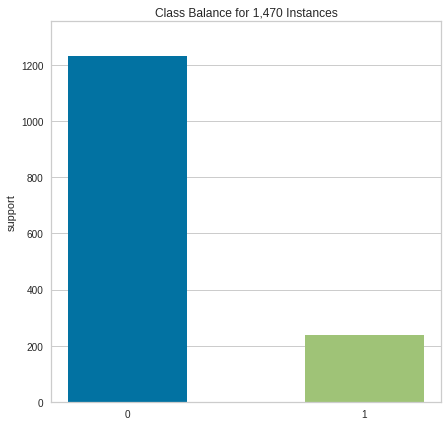

In [87]:
# Importando a biblioteca yellowbrick, usada para plotar gráficos espefícios de modelagem

from yellowbrick.target import class_balance

class_balance(df['Turnover']);

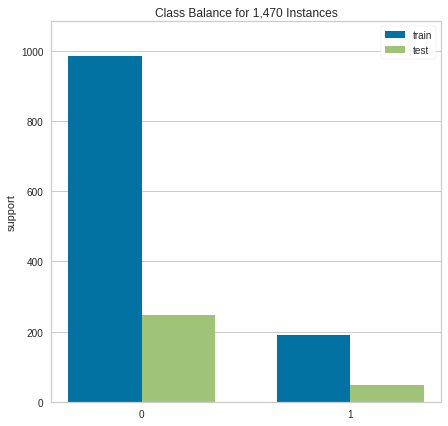

In [88]:
# Vamos plotar a distribuição da coluna Turnover separada por conjunto de treino e teste

visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train, y_test)        
visualizer.show();

A nossa base de dados está bastante desbalanceada. 

Usando a biblioteca Imbalanced-learn (`imblearn`) é possível aplicar facilmente técnicas de balanceamento de dados. 

Uma delas é a técnica Smote, que utiliza KNN (KNearestNeighbor)

A SMOTE cria novos dados a partir da classe com menor quantidade de valores. Logo, é considerado uma técnica de oversampling.

O oversampling aumenta a quantidade de valores da classe com menor quantidade de valores, fazendo com que o conjunto de dados aumente e as classes se tornem balanceadas.

In [89]:
# Importando a biblioteca imblearn e o SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

Em seguida, faremos a divisão entre X e y.

In [90]:
X = df_scaled.drop('Turnover', axis=1)
y = df_scaled['Turnover']

Definidos X e y, agora faremos X_resampled e y_resampled. A partir desses valores, faremos um .fit do nosso SMOTE como se estivéssemos treinando um modelo comum de machine learning.

In [91]:
X_resampled, y_resampled = smote.fit_resample(X,y)

Agora, precisamos montar o nosso dataframe após o balanceamento das classes da coluna 'Turnover'. 

Nós usaremos o método de concatenação do Pandas, concat. Começaremos pelo y, pois dessa vez vamos colocar a coluna target em primeiro. Além disso, precisamos passar que ele é o eixo 1. 

Por fim, adicionaremos df_balanceado para saber quantas linhas ele fez.

In [92]:
df_balanceado = pd.concat([y_resampled, X_resampled], axis=1)
print(df_scaled.Turnover.value_counts())
print()
df_balanceado.Turnover.value_counts()

0.0    1233
1.0     237
Name: Turnover, dtype: int64



1.0    1233
0.0    1233
Name: Turnover, dtype: int64

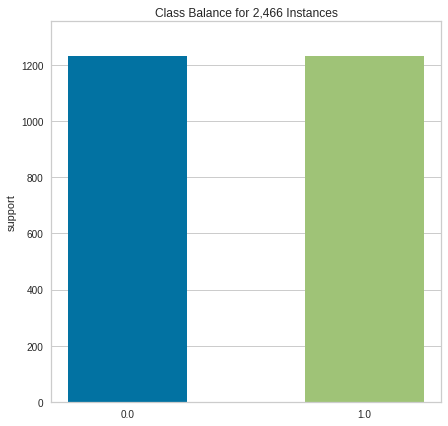

In [93]:
# Plotando a distribuição das classes após usar o SMOTE
class_balance(df_balanceado['Turnover']);

As classes de turnover e não turnover agora têm a mesma quantidade de observações, ou seja, os dados estão perfeitamente balanceados (as duas classes têm 1233 observações)

O SMOTE fez o que desejávamos: todos os valores são idênticos e provavelmente agora as nossas análises ficarão bem melhores. 

Para checarmos se elas melhorarão ou não, copiaremos o mesmo código que tínhamos antes e, ao invés de df, escreveremos df_balanceado.

In [94]:
df_balanceado.head()

,Turnover,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.875,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.000,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.625,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.000,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
# Vamos definir os novos X e y, agora com o dados balanceados

X = df_balanceado.iloc[:, 1:]
y = df_balanceado['Turnover']

In [96]:
# Checando se X e y têm a mesma quantidade de linhas
# O y tem 2466 linhas e uma coluna (apenas a coluna Turnover), e o X tem 2466 linhas se 44 colunas
y.shape, X.shape

((2466,), (2466, 44))

Vamos treinar novamente os modelos e ver como eles se saem com o dataset balanceado

In [97]:
# Dividir o dataset entre treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)

## 8.1) Random Forest (dados balanceados)

In [98]:
# Vamos treinar novamente o nosso modelo de Random Forest

forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [99]:
# Verificando a matriz de confusão

confusion_matrix(y_test, y_pred_forest)

array([[295,  14],
       [ 30, 278]])

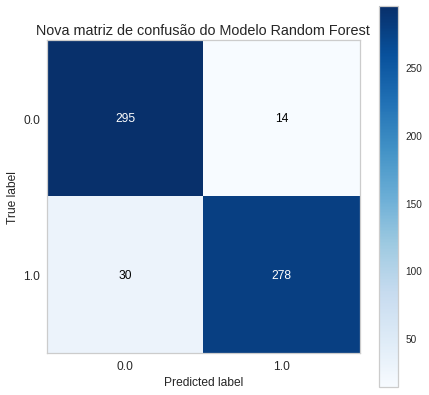

In [100]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_forest, title='Nova matriz de confusão do Modelo Random Forest', cmap='Blues');

In [101]:
print('Random Forest (dados balanceados)')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_forest)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_forest)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_forest)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_forest)*100, 2)}%')

Random Forest (dados balanceados)
--------------------
Acurácia: 92.87%
Precisão: 95.21%
Sensibilidade: 90.26%
f1_score: 92.67%


## 8.2) Regressão Logística (dados balanceados)

In [102]:
# Vamos treinar novamente o nosso modelo de Regressão Logística, agora com os dados balanceados

log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

confusion_matrix(y_test, y_pred_log)

array([[245,  64],
       [ 46, 262]])

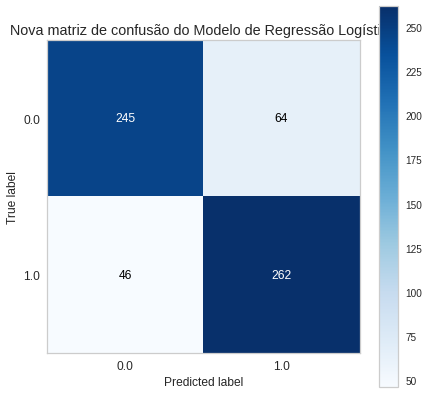

In [103]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log, title='Nova matriz de confusão do Modelo de Regressão Logística', cmap='Blues');

In [104]:
print('Regressão Logística (dados balanceados')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_log)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_log)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_log)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_log)*100, 2)}%')

Regressão Logística (dados balanceados
--------------------
Acurácia: 82.17%
Precisão: 80.37%
Sensibilidade: 85.06%
f1_score: 82.65%


## 8.3) Redes Neurais (dados balanceados)

In [105]:
# o parâmetro optimizer é o algoritmo usado para fazer o ajuste dos 4.941 "pesos"
# o parâmetro loss é como o erro vai ser calculado (loss='binary_crossentropy' porque é um problema de classificação binária)

#rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['Recall'])

In [106]:
rede_neural.fit(X_train, y_train, epochs=50)
y_pred_neural = rede_neural.predict(X_test)
y_pred_neural = (y_pred_neural >= 0.5)

Epoch 1/50
58/58 [==============================] - 0s 5ms/step - loss: 0.4291 - recall: 0.7568
Epoch 2/50
58/58 [==============================] - 0s 5ms/step - loss: 0.3905 - recall: 0.8151
Epoch 3/50
58/58 [==============================] - 0s 5ms/step - loss: 0.3816 - recall: 0.8076
Epoch 4/50
58/58 [==============================] - 0s 4ms/step - loss: 0.3792 - recall: 0.8162
Epoch 5/50
58/58 [==============================] - 0s 4ms/step - loss: 0.3715 - recall: 0.8130
Epoch 6/50
58/58 [==============================] - 0s 3ms/step - loss: 0.3681 - recall: 0.8422
Epoch 7/50
58/58 [==============================] - 0s 3ms/step - loss: 0.3606 - recall: 0.8086
Epoch 8/50
58/58 [==============================] - 0s 7ms/step - loss: 0.3610 - recall: 0.8465
Epoch 9/50
58/58 [==============================] - 0s 5ms/step - loss: 0.3556 - recall: 0.8324
Epoch 10/50
58/58 [==============================] - 0s 5ms/step - loss: 0.3532 - recall: 0.8476
Epoch 11/50
58/58 [====================

In [107]:
rede_neural.evaluate(X_test,y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.3273 - recall: 0.9318


[0.32725197076797485, 0.9318181872367859]

In [108]:
confusion_matrix(y_test, y_pred_neural)

array([[252,  57],
       [ 21, 287]])

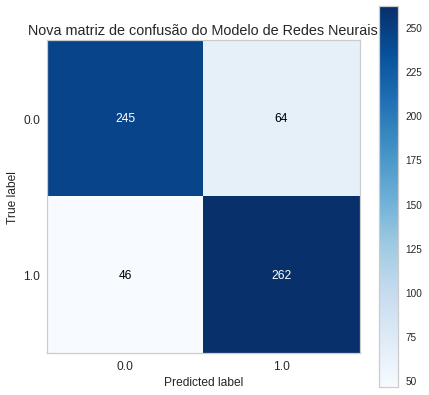

In [109]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log, title='Nova matriz de confusão do Modelo de Redes Neurais', cmap='Blues');

In [110]:
print('Redes Neurais (dados balanceados)')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_neural)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_neural)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_neural)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_neural)*100, 2)}%')

Redes Neurais (dados balanceados)
--------------------
Acurácia: 87.36%
Precisão: 83.43%
Sensibilidade: 93.18%
f1_score: 88.04%


## 8.4) XGBoost Classifier (dados balanceados)

In [111]:
# carregando as bibliotecas necessárias

from xgboost import XGBClassifier

In [112]:
xgb = XGBClassifier(n_estimators = 100,
                    max_depth = 10,
                    learning_rate = 0.01,
                    subsample = 1,
                    random_state=42)


X_train, X_teste, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25, stratify=y, shuffle=True)
# Treinando o modelo XGB classifier
xgb.fit(X_train, y_train)

# fazendo a predição com os dados de teste
y_pred_xgb = xgb.predict(X_test)

In [113]:
confusion_matrix(y_test, y_pred_xgb)

array([[267,  42],
       [ 34, 274]])

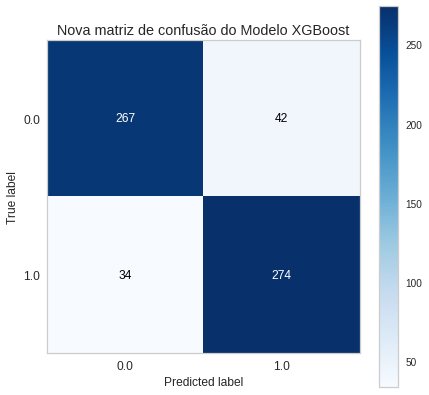

In [114]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb, title='Nova matriz de confusão do Modelo XGBoost', cmap='Blues');

In [115]:
print('XGBoost Classifier (dados balanceados)')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_xgb)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_xgb)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_xgb)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_xgb)*100, 2)}%')

XGBoost Classifier (dados balanceados)
--------------------
Acurácia: 87.68%
Precisão: 86.71%
Sensibilidade: 88.96%
f1_score: 87.82%


## 8.5) Análise de Métricas

O recall é a métrica mais importante para nosso algoritmo de previsão de saída de funcionários, uma vez que é muito mais problemático não classificar corretamente os que têm maior probabilidade de sair da empresa, o que pode gerar mais gastos.

In [116]:
classificadores = [xgb, log, forest]

In [117]:
for name in classificadores:
  print(name.__class__.__name__)

XGBClassifier
LogisticRegression
RandomForestClassifier


In [118]:
for classificador in classificadores:
  nome = classificador.__class__.__name__

  print(nome)
  print("-"*20)
  y_pred = classificador.predict(X_test)
  print(f"Acurácia: {round(accuracy_score(y_test, y_pred)*100,2)}%")
  print(f"Precisão: {round(precision_score(y_test, y_pred)*100,2)}%")
  print(f"Recall: {round(recall_score(y_test, y_pred)*100,2)}%")
  print(f"F1: {round(f1_score(y_test, y_pred)*100,2)}%", end='\n'*2)

print('Redes Neurais')
print("-"*20)
print(f"Acurácia: {round(accuracy_score(y_test, y_pred_neural)*100,2)}%")
print(f"Precisão: {round(precision_score(y_test, y_pred_neural)*100,2)}%")
print(f"Recall: {round(recall_score(y_test, y_pred_neural)*100,2)}%")
print(f"F1: {round(f1_score(y_test, y_pred_neural)*100,2)}%", end='\n'*2)

XGBClassifier
--------------------
Acurácia: 87.68%
Precisão: 86.71%
Recall: 88.96%
F1: 87.82%

LogisticRegression
--------------------
Acurácia: 82.17%
Precisão: 80.37%
Recall: 85.06%
F1: 82.65%

RandomForestClassifier
--------------------
Acurácia: 92.87%
Precisão: 95.21%
Recall: 90.26%
F1: 92.67%

Redes Neurais
--------------------
Acurácia: 87.36%
Precisão: 83.43%
Recall: 93.18%
F1: 88.04%



# 9) Otimização de Hiperpartâmetros

Hyperparameter tuning (ou otimização de hipermarâmetros) é o processo de combinar os melhores hiperparâmetros para maximizar a performance do modelo. 



## 9.1) Randomized Search CV

- RandomizedSearchCV é um algorimo que funciona executando milhares de combinaçãoes entre cada hiperparâmetro fazendo multiplos teste em um único procsso. 
- Terminando essa processo, teremos o conjunto de hiperparâmetros que provavalmente conseguirá métricas melhores que as anteriores.


In [119]:
from sklearn.model_selection import RandomizedSearchCV

### 9.1.1) XGBoost Classifier (dados balanceados e hiperparâmetros otimizados)

In [120]:
# Vamos criar um dicionário contendo uma lista de possíveis valores para cada um dos hiperparâmetos do algoritmo XGBoost
 
param_grid = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [121]:
# Passmos para o RandomizedSearch o modelo que quermos otimizar (xgb), 
# o dicionário de parâmetros (param_grid) e o score que queremos maximizar (recall)
rs_model = RandomizedSearchCV(
    xgb, param_distributions = param_grid, n_iter=50, scoring='recall',n_jobs=-1,cv=10,verbose=3
    )

Vamos agora adequar os conjuntos de parâmetros ao modelo XGBooster. 
Vamos também usar um código (%%time) para verificar o tempo que o algoritmo leva para encontrar o melhor conjunto de hiperparâmetros para o modelo XGBooster

In [122]:
%%time
# model fitting
rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
CPU times: user 3.25 s, sys: 354 ms, total: 3.6 s
Wall time: 2min 15s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(learning_rate=0.01, max_depth=10,
                                           random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='recall', verbose=3)

O RandomSearch levou 2 minutos e 11 segundos para calcular o melhor conjunto de hiperparâmetro que maximizasse o 'recall' (parâmetro scoring='recall' do RandomSearchCV)

In [123]:
# Vendo quais hiperparâmetros foram selecionados usando o método best_estimator_
rs_model.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6,
              min_child_weight=3, random_state=42)

In [124]:
# Agora podemos instanciar e treinar o modelo com o conjunto de hiperparâmetros encontrados
xgb_final = rs_model.best_estimator_

In [125]:
xgb_final.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=6,
              min_child_weight=3, random_state=42)

In [126]:
y_pred_xgb_final = xgb_final.predict(X_test)

In [127]:
confusion_matrix(y_test, y_pred_xgb_final)

array([[299,  10],
       [ 30, 278]])

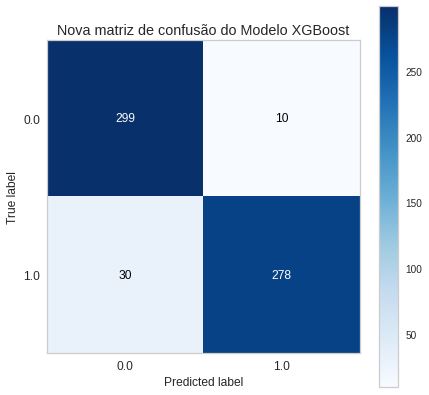

In [128]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb_final, title='Nova matriz de confusão do Modelo XGBoost', cmap='Blues');

In [129]:
print('XGBoost Classifier (dados balanceados e hypertuning)')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_xgb_final)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_xgb_final)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_xgb_final)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_xgb_final)*100, 2)}%')

XGBoost Classifier (dados balanceados e hypertuning)
--------------------
Acurácia: 93.52%
Precisão: 96.53%
Sensibilidade: 90.26%
f1_score: 93.29%


Com a otimização o modelo XGBoost melhorou a acurácia em 5%, a precisão em 8%, o recall em 2% e o F1 em quase 5%.

### 9.1.2) Random Forest (dados balanceados e hiperparâmetros otimizados)

In [130]:
# Vamos criar uma lista de valores para cada um dos hiperparâmetros

n_estimators = np.arange(20,1000, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 15, step=1))
min_samples_split = np.arange(2, 15, step=1)
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

In [131]:
# Passando as listas para um dicionário de hiperparâmetros
param_grid_forest = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
    }

In [132]:
# Instanciando o Random Forest
novo_forest = RandomForestClassifier(random_state=42)

In [133]:
# Passando o dicionário com as listas de hiperparâmetros para o RandomSearch testar
# E procurar a melhor combinação de hiperparâmetros para maximizar o recall

random_cv = RandomizedSearchCV(
        novo_forest, param_grid_forest, n_iter=40, cv=5, scoring='recall', n_jobs=-1, random_state = 42
)

In [134]:
%%time
forest_rscv = random_cv.fit(X_train, y_train)

CPU times: user 4.41 s, sys: 284 ms, total: 4.7 s
Wall time: 5min 19s


In [135]:
# Vamos ver qual foi o melhor conjunto de hiperparâmetros encontrado para o modelo Random Forest
forest_rscv.best_params_

{'n_estimators': 360,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'entropy',
 'bootstrap': False}

In [136]:
# Aplicaremos os nossos best_params ou os melhores parâmetros escolhidos pelo Randomizedsearchcv dentro do Random Forest.
forest_final = RandomForestClassifier(**forest_rscv.best_params_, random_state = 42)

forest_final.fit(X_train, y_train)
y_pred_forest_final = forest_final.predict(X_test)

In [137]:
# Analisando a nova matriz de confusão

confusion_matrix(y_test, y_pred_forest_final)

array([[299,  10],
       [ 29, 279]])

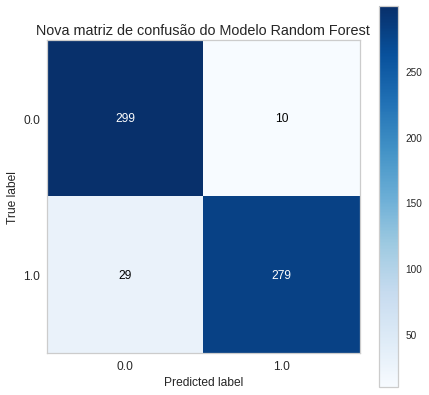

In [138]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_forest_final, title='Nova matriz de confusão do Modelo Random Forest', cmap='Blues');

In [139]:
print('Random Forest (dados balanceados e hiperparâmetros otimizados)')
print('-'*20)
print(f'Acurácia: {round(accuracy_score(y_test, y_pred_forest_final)*100, 2)}%')
print(f'Precisão: {round(precision_score(y_test, y_pred_forest_final)*100, 2)}%')
print(f'Sensibilidade: {round(recall_score(y_test, y_pred_forest_final)*100, 2)}%')
print(f'f1_score: {round(f1_score(y_test, y_pred_forest_final)*100, 2)}%')

Random Forest (dados balanceados e hiperparâmetros otimizados)
--------------------
Acurácia: 93.68%
Precisão: 96.54%
Sensibilidade: 90.58%
f1_score: 93.47%


- Com a otimização o modelo Random Forest melhorou a acurácia em 1%, a precisão em 1%, o recall em 0.3% e o F1 em 1%. 
- A melhora foi bem menor do que com o modelo XGBoost, indicando que os hiperparâmetros já estavam bem próximos do ideal 

## 9.2) Validação Cruzada

![](https://drive.google.com/uc?export=view&id=1NedqcgOtp-J8xi_E8krjPSZkU08JGHC5)


- A validação cruzada é uma técnica de avaliação de modelo e treinamento que divide os dados em várias partições e treina vários algoritmos nessas partições. Essa técnica melhora a robustez do modelo mantendo os dados do processo de treinamento. 




In [140]:
# Importando o algoritmo de validação cruzada do sklearn

from sklearn.model_selection import cross_validate

### 9.2.1) XGBoost Classifier

In [141]:
scores_cv_xgb = cross_validate(xgb_final, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=10)
scores_cv_xgb = pd.DataFrame(scores_cv_xgb)
scores_cv_xgb

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.806047,0.010367,0.684211,0.379032,0.979167,0.546512
1,0.808355,0.012565,0.744939,0.500000,0.984127,0.663102
2,0.714114,0.006910,0.975709,1.000000,0.953846,0.976378
3,0.528608,0.007248,0.959514,1.000000,0.924812,0.960938
4,0.531629,0.006943,0.971660,1.000000,0.946154,0.972332
5,0.519157,0.006877,0.967611,0.991870,0.945736,0.968254
6,0.525163,0.006857,0.979675,1.000000,0.960938,0.980080
7,0.519564,0.006858,0.967480,1.000000,0.938931,0.968504
8,0.532172,0.007156,0.983740,1.000000,0.968504,0.984000
9,0.523524,0.008008,0.983740,1.000000,0.968504,0.984000


In [142]:
# Dividimos o Dataset em dez partes, e usamos cada uma das partes uma vez como conjunto de teste
# Agora vamos calcular a média de cada desses scores do modelo XGBoost

scores_cv_xgb.mean()

fit_time          0.600833
score_time        0.007979
test_accuracy     0.921828
test_recall       0.887090
test_precision    0.957072
test_f1           0.900410
dtype: float64

In [143]:
# Vamos passar para os valores para um dataframe, retirando as colunas 'fit_time' e 'score_time'
# E os índices do dataframe serão as métricas 

scores_cv_xgb = pd.DataFrame(scores_cv_xgb.mean(), columns=['avg_XGB_scores'])
scores_cv_xgb = scores_cv_xgb.drop(['fit_time', 'score_time'], axis=0)
scores_cv_xgb.index = ['accuracy', 'recall', 'precision', 'f1']
scores_cv_xgb

,avg_XGB_scores
accuracy,0.921828
recall,0.887090
precision,0.957072
f1,0.900410


### 9.2.1) Random Forest

In [144]:
# Calculo da média dos scores do modelo Random Forest

scores_cv_forest = cross_validate(forest_final, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=10)
scores_cv_forest = pd.DataFrame(scores_cv_forest)
scores_cv_forest

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,2.592500,0.058937,0.777328,0.556452,1.000000,0.715026
1,2.558424,0.061153,0.765182,0.532258,1.000000,0.694737
2,3.372690,0.079150,0.987854,1.000000,0.976378,0.988048
3,2.628741,0.050417,0.979757,0.975610,0.983607,0.979592
4,2.493279,0.050219,0.983806,1.000000,0.968504,0.984000
5,2.462605,0.051488,0.983806,0.991870,0.976000,0.983871
6,2.464055,0.050304,0.975610,0.991870,0.960630,0.976000
7,3.534673,0.049259,0.991870,1.000000,0.984000,0.991935
8,2.514160,0.052536,0.983740,0.983740,0.983740,0.983740
9,2.447553,0.050351,0.979675,1.000000,0.960938,0.980080


In [145]:
scores_cv_forest.mean()

fit_time          2.706868
score_time        0.055381
test_accuracy     0.940863
test_recall       0.903180
test_precision    0.979380
test_f1           0.927703
dtype: float64

In [146]:
scores_cv_forest = pd.DataFrame(scores_cv_forest.mean(), columns=['avg_forest_scores'])
scores_cv_forest = scores_cv_forest.drop(['fit_time', 'score_time'], axis=0)
scores_cv_forest.index = ['accuracy', 'recall', 'precision', 'f1']
scores_cv_forest

,avg_forest_scores
accuracy,0.940863
recall,0.903180
precision,0.979380
f1,0.927703


In [147]:
# Unindo os dataframes da médias dos scores de cada modelo

scores_cv = pd.concat([scores_cv_forest, scores_cv_xgb], axis=1)
scores_cv

,avg_forest_scores,avg_XGB_scores
accuracy,0.940863,0.921828
recall,0.903180,0.887090
precision,0.979380,0.957072
f1,0.927703,0.900410


## 9.3) Análise de Métricas

- Validação Cruzada
- XGBoostClassifier (com dados balanceados e parâmetros otimizados) 
- Random Forest (com dados balanceados e parâmetros otimizados)

In [148]:
classificadores_final = [xgb_final, forest_final]

In [149]:
for name in classificadores_final:
  print(name.__class__.__name__)

XGBClassifier
RandomForestClassifier


In [150]:
for classificador in classificadores_final:
  nome = classificador.__class__.__name__

  print(nome)
  print("-"*20)
  y_pred = classificador.predict(X_test)
  print(f"Acurácia: {round(accuracy_score(y_test, y_pred)*100,2)}%")
  print(f"Precisão: {round(precision_score(y_test, y_pred)*100,2)}%")
  print(f"Recall: {round(recall_score(y_test, y_pred)*100,2)}%")
  print(f"F1: {round(f1_score(y_test, y_pred)*100,2)}%", end='\n'*2)

XGBClassifier
--------------------
Acurácia: 93.52%
Precisão: 96.53%
Recall: 90.26%
F1: 93.29%

RandomForestClassifier
--------------------
Acurácia: 93.68%
Precisão: 96.54%
Recall: 90.58%
F1: 93.47%



In [151]:
# Scores da Validação Cruzada

scores_cv

,avg_forest_scores,avg_XGB_scores
accuracy,0.940863,0.921828
recall,0.903180,0.887090
precision,0.979380,0.957072
f1,0.927703,0.900410


Os dois modelos tiveram desempenho parecido, mas o Random Forest foi um pouco melhor, principalmente comparando as médias de avaliações após a validação cruzada. 

# 10) Overfitting (sobreajuste)

![](https://drive.google.com/uc?export=view&id=1Bbu284-qXWcqAl4VaVCc7f34NOIZIvg7)


- O **overfitting** é um comportamento indesejável de aprendizado de máquina que ocorre quando o modelo de aprendizado de máquina fornece previsões precisas para dados de treinamento, mas não para novos dados.
- Uma das maneiras de evitá-lo é usando a *validação cruzada*, comparando a diferença entre os scores de cada uma das validações



In [152]:
# Aplicando a validação cruzada no modelo Random Forest
scores_cv_forest_shuffle = cross_validate(
                                  forest_final, X, y, 
                                  scoring=['accuracy', 'recall', 'precision', 'f1'], 
                                  cv=StratifiedKFold(n_splits=10, shuffle=True)
                                  )

In [153]:
scores_cv_forest_shuffle

{'fit_time': array([2.57425547, 3.04173422, 2.97175884, 2.47726727, 2.4768784 ,
        2.46730709, 3.34763098, 2.60798526, 2.47597361, 2.45191073]),
 'score_time': array([0.05097222, 0.08404899, 0.05543494, 0.06232691, 0.05671358,
        0.05438328, 0.07586408, 0.05173635, 0.05302715, 0.05016828]),
 'test_accuracy': array([0.94736842, 0.951417  , 0.91902834, 0.96761134, 0.94736842,
        0.93117409, 0.93089431, 0.94308943, 0.95934959, 0.93089431]),
 'test_recall': array([0.92741935, 0.91129032, 0.88709677, 0.94308943, 0.90243902,
        0.88617886, 0.87804878, 0.91056911, 0.92682927, 0.89430894]),
 'test_precision': array([0.96638655, 0.99122807, 0.94827586, 0.99145299, 0.99107143,
        0.97321429, 0.98181818, 0.97391304, 0.99130435, 0.96491228]),
 'test_f1': array([0.94650206, 0.94957983, 0.91666667, 0.96666667, 0.94468085,
        0.92765957, 0.92703863, 0.94117647, 0.95798319, 0.92827004])}

In [154]:
scores_cv_forest_shuffle = pd.DataFrame(scores_cv_forest_shuffle)
scores_cv_forest_shuffle.mean()

fit_time          2.689270
score_time        0.059468
test_accuracy     0.942820
test_recall       0.906727
test_precision    0.977358
test_f1           0.940622
dtype: float64

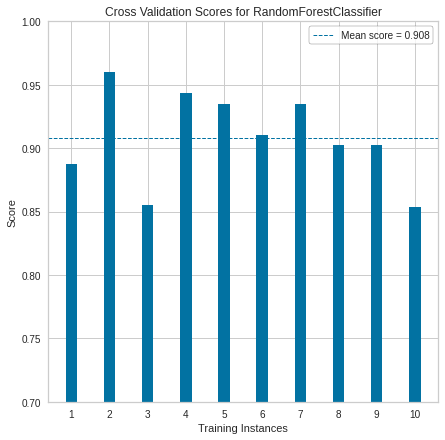

In [155]:
# Vamos usar a biblioteca yellowbrick para plotar o score de cada uma das validações

from yellowbrick.model_selection import CVScores

visualizer = CVScores(forest_final, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring='recall')

plt.ylim(0.7, 1)  
visualizer.fit(X, y)        
visualizer.show();          

Os scores entre as avaliações varia de 0.86 a 0.93. Essa pequena diferença é indicativa de que não houve overfitting

# 11) Variáveis mais importantes para o modelo escolhido

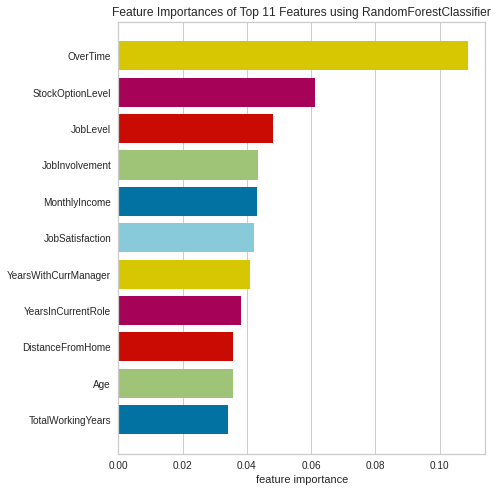

In [156]:
# Importando a biblioteca yellowbrick usada para plotar gráfico a partir
# de algoritmos de machine learning

from yellowbrick.model_selection import FeatureImportances

# Vamos fazer um gráfico das 11 variáveis mais importantes

viz = FeatureImportances(forest_final, topn=11, relative=False)
viz.fit(X, y)
viz.show();

In [157]:
# Usaremos a biblioteca Plotly para fazer um gráfico interativo da importância de cada variável
# para o nosso modelo Random Forest 

import plotly as py
trace = go.Scatter(
    y = forest_final.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = forest_final.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Variáveis mais importantes no modelo Random Forest',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Importância das Variáveis',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)

fig.show()

# 12) Salvando o Modelo Final

In [158]:
# pickle é a biblioteca usada para salvar as variáveis (ou modelos e restaurá-los já treinados)
import pickle

In [159]:
# o primeiro parâmetro do método .dump() define as variáveis que serão salvas (com nome f)
# as variáveis scaler e smote precisam ser salvas para deixar os próximos dados no formato para ser colocado no modelo

with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, smote, forest_final], f)

In [160]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, smote, model = pickle.load(f)

In [161]:
min_max, smote, model

(MinMaxScaler(),
 SMOTE(random_state=42),
 RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14,
                        max_features='sqrt', min_samples_split=9,
                        n_estimators=360, random_state=42))

# 13) Conclusão



## 13.1) Modelo Escolhido: Random Forest

![](https://drive.google.com/uc?export=view&id=1zsMwJ_cEnUbMbscUdb8b7vRsv_JUk1pY)


O modelo com as melhores porcentagens de acerto em todas as métricas (acurácia, sensibilidade, precisão e F1_score) foi o Random Forest, após o balanceamento dos dados usando a biblioteca imblearn e a otimização de hiperparâmetros usando o algoritmo RandomSearchCV.

## 13.2) Relatório

- Inicialmente comparamos 4 tipos de algoritmos de machine learning (Regressão Logística, KNearestNeighbours, Support Vector Machine, Random Forest e Redes Neurais.
- Embora a acurácia/perfomarce geral de todos os cinco foi muito boa (81.63% a 86.39%), para esse projeto, a sensibilidade/recall é a métrica mais importante, e ela foi bastante baixa, variando de 4.26% (SVM) a 29.79% (empatados Regressão Logística e Redes Neurais).




- O principal motivo foi o desbalanceamento dos dados, ou seja, existem muito mais registros de funcionários que ficaram do que funcionários que saíram da empresas (1233 e 237). 
- Para igualar o número de registros na coluna alvo, usamos uma técnica de Oversampling, que consiste em aumentar a quantidade de registros da classe com menor frequência até que a base de dados possua uma quantidade equilibrada entre as classes da variável alvo. 
- Aplicamos a técnica SMOTE, que se baseia no algoritmo KNN, para igualar a quantidade de registros (1233 e 1233)


![](https://drive.google.com/uc?export=view&id=1v7xMpx-PPnh4t5IbVAzKCHNgS2oLjXWa)



- Após o balanceamento dos dados, treinamos os modelos com as melhores previsões (Random Forest, Regressão Logística e Redes Neurais), usando os dados balanceados.
- Testamos também o algoritmo XGBoost Classifier.
- Após a aplicação do oversampling a performance de todos os modelos melhorou muito, principalmente o recall, que variou entre 85.06% (Regressão Logística) a 90.26% (Random Forest).






- A próxima etapa foi a otimização dos hiperparâmetros dos dois melhores modelos, XGBoost e Random Forest, usando o algoritmo Random Search CV.
- Após, usamos a validação cruzada para comparar o desempenho real dos modelos e para evitar o overfitting.
- Por fim, fizemos gráficos das variáveis mais importantes e que mais influenciam o modelo Random Forest.

## 13.3) Considerações Finais

- Em conclusão, este projeto de Ciência de Dados visou identificar os fatores que contribuem para a saída de funcionários e desenvolver estratégias para evitá-la. 

- Através da análise de dados de funcionários, descobrimos que o excesso de horas extras trabalhadas, falta de opções de compras de ações, insatisfação no trabalho, falta de oportunidades de crescimento, e compensação inadequada são os fatores primários que contribuem para a rotatividade de funcionários. 


-Para abordar esses problemas e reduzir a saída de funcionários, recomendamos o seguinte:

**Horário Flexível**: sendo a quantidade de horas extras trabalhadas o fator que mais influencia a saída de funcionáros, a empresa pode oferecer opções como trabalho home office, horário de trabalho flexível, aumentar o valor pago por horas extras, e envestir em treinamento aos funcionários, aumentando sua produtividade, bem como reduzindo a necessidade de trabalho após o horário normal.

**Fornecer compensação justa e competitiva**: funcionários que se sentem compensados de forma justa são mais propensos a permanecer na empresa. Não só o salário, mas a possibilidade de o empregado poder adquirir ações da empresa por preço abaixo do preço do mercado (Stock Option) é um fator ainda mais importante. 

**Melhorar o ambiente de trabalho**:  inclui criar uma cultura positiva e de apoio no local de trabalho, promover o equilíbrio entre trabalho e vida pessoal e abordar quaisquer preocupações de saúde e segurança.

**Oferecer oportunidades de desenvolvimento profissional**: os funcionários precisam sentir que estão crescendo e avançando em suas carreiras. Fornecer treinamento, mentorias e outras oportunidades de desenvolvimento pode ajudar os funcionários a se sentirem mais engajados e realizados em seu trabalho.

**Melhorar as práticas de gestão**: os gerentes desempenham um papel crítico na retenção de funcionários. Melhorar as práticas de gestão, como fornecer feedback regular, promover comunicação aberta e ser acessível e responsivo às preocupações dos funcionários, pode ajudar a melhorar o moral dos funcionários e reduzir a rotatividade.

Em conclusão, abordar os fatores que contribuem para a demissão de funcionários é fundamental para reduzir a taxa de rotatividade e melhorar a satisfação e retenção geral de funcionários. Ao implementar as recomendações apresentadas neste projeto, as organizações podem melhorar sua capacidade de reter talentos de ponta e criar um ambiente de trabalho mais positivo e produtivo.